# Testing Environment for Eurus
Shaun Hadden & Brendan Smithyman | October, 2015

## Imports

In [1]:
import numpy as np
from extend import Eurus

Cannot import 'fullwv'; callback functions will not work!


In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

## Helper functions

In [3]:
class Source(object):
    
    def __init__(self, sc):
                
        self._x, self._z = np.mgrid[
            0:sc['dx']*sc['nx']:sc['dx'],
            0:sc['dz']*sc['nz']:sc['dz']
        ]
    
    def __call__(self, x, z):
        
        dist = np.sqrt((self._x - x)**2 + (self._z - z)**2)
        srcterm = 1.*(dist == dist.min())
        nz, nx = self._x.shape
        
        return np.hstack([srcterm.ravel() / srcterm.sum(), np.zeros(nx*nz, dtype=np.complex128)])

## Modelling setup

In [4]:
# Geometry parameters
dx          = 1.
dz          = 1.
nx          = 51
nz          = 51

# Bulk parameters
velocity    = 2000.     * np.ones((nz,nx))
density     = 1.     * np.ones((nz,nx))

# Anisotropy parameters
theta       = 0.         * np.ones((nz,nx))
epsilon     = 0.2        * np.ones((nz,nx))
delta       = 0.1        * np.ones((nz,nx))

# Other parameters
freq        = 8.
freeSurf    = [False, False, False, False]
nPML        = 5


# Pack values into systemConfig dictionary
systemConfig = {
    'nx':       nx,
    'nz':       nz,
    'dx':       dx,
    'dz':       dz,

    'c':        velocity,
    'rho':      density,
    
    'theta':    theta,
    'eps':      epsilon,
    'delta':    delta,

    'freq':     freq,
    'freeSurf': freeSurf,
    'nPML':     nPML,
}

## Testing

In [5]:
Ainv = Eurus(systemConfig)
src = Source(systemConfig)

[[ 1.99470445 +9.99985978e-01j  1.99470445 +9.99985978e-01j
   1.91898708 +9.23866578e-01j  1.70336226 +7.07096866e-01j
   1.38065691 +3.82678067e-01j  1.00000000 +6.12314814e-17j
   1.00000000 +0.00000000e+00j  1.00000000 +0.00000000e+00j
   1.00000000 +0.00000000e+00j  1.00000000 +0.00000000e+00j
   1.00000000 +0.00000000e+00j  1.00000000 +0.00000000e+00j
   1.00000000 +0.00000000e+00j  1.00000000 +0.00000000e+00j
   1.00000000 +0.00000000e+00j  1.00000000 +0.00000000e+00j
   1.00000000 +0.00000000e+00j  1.00000000 +0.00000000e+00j
   1.00000000 +0.00000000e+00j  1.00000000 +0.00000000e+00j
   1.00000000 +0.00000000e+00j  1.00000000 +0.00000000e+00j
   1.00000000 +0.00000000e+00j  1.00000000 +0.00000000e+00j
   1.00000000 +0.00000000e+00j  1.00000000 +0.00000000e+00j
   1.00000000 +0.00000000e+00j  1.00000000 +0.00000000e+00j
   1.00000000 +0.00000000e+00j  1.00000000 +0.00000000e+00j
   1.00000000 +0.00000000e+00j  1.00000000 +0.00000000e+00j
   1.00000000 +0.00000000e+00j  1.000000

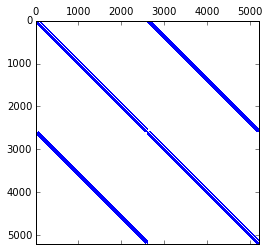

In [6]:
plt.spy(Ainv.A, markersize=0.1, marker=',')

In [7]:
q = src(25,25)
u = Ainv*q

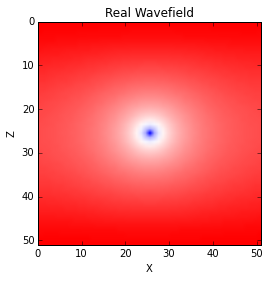

In [8]:
plotopts = {
    'extent':   [0, nx*dx, nz*dz, 0],
    'cmap':     cm.bwr,
#     'vmin':     -1.,
#     'vmax':     1.,
}

fig = plt.figure()

ax = fig.add_subplot(1,1,1, aspect=1)
plt.imshow(u[:nx*nz].reshape((nz,nx)).real, **plotopts)
plt.title('Real Wavefield')
plt.xlabel('X')
plt.ylabel('Z')